## End-to-end Machine Learning Project

#### 1.Look at the big picture.
#### 2. Get the data.
#### 3. Discover and visualize the data to gain insights.
#### 4. Prepare the data for Machine Learning algorithms.
#### 5. Select a model and train it.
#### 6. Fine-tune your model.
#### 7. Present your solution.
#### 8. Launch, monitor, and maintain your system.

### 1. Look at the big picture.
The goal of this project is to build a model of predicting the median housing price in all district in California.

1. What exactly is the business ojective?

        whether it is worth investing a given area or nor.

2. What the current solution looks like?

        The District housing price are currently estumated manually by experts.

3. Design your system
        3.1. It is a supervised learning problem. A regressin task. It is also a univariate regression problem since we only tring to predict a single value for each district. Also, there is no continouts flow of data coming in the system. There is no particular need to adjust to changing data rapidly, and the data is small enough to fit in memory, so plain batch learning should be just fine. 

        3.2. Select a perfomance measure.
        We will use RMSE and MAE as the measure.


### 2. Get the Data

In [1]:
import os
import tarfile
from six.moves import urllib
import pandas as pd

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)

In [2]:
fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH)

In [3]:
df = pd.read_csv(HOUSING_PATH+ '/housing.csv')

In [4]:
### Check the data structure 
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.shape

(20640, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Only the total_bedrooms column has null values. We may delete those rows because only 107 rows.

In [7]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


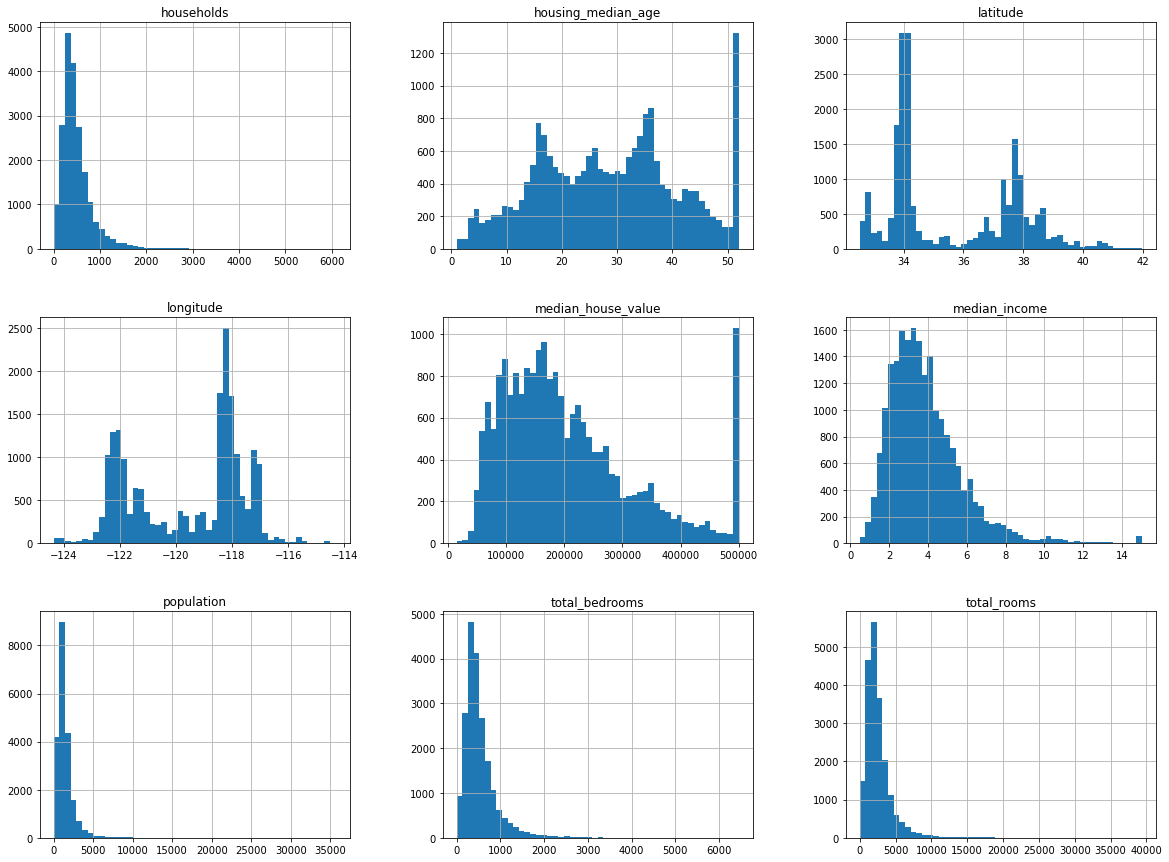

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(bins = 50, figsize = (20,15))
plt.show()

1. The median income has been scaled and capped at 15 (actually 15.0001) for higher median incomes, and at 0.5 (actually 0.4999) for lower median incomes.
2. Lots of the houses' median house value fall into the 490000 to 500000 range. 
3. Lots of the houses' median house age fall into the 50 to 55 range. 
4. Many histograms above are tail heavy: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.

#### Create a Test Set


In [10]:
from sklearn.model_selection import train_test_split
y = df.median_income
x = df.drop('median_income',axis=1)

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,96500.0,INLAND


If the dataset is not big enough, you run the risk of introducing a significant sampling bias. We need to make sure the sampling is representative of the whole population. One way to achieve this is using the stratified sampling method.The population is divided into homogeneous subgroups called strata, and the right number of instances is sampled from each stratum to guarantee that the test set is representative of the overall population. 

Suppose you chatted with experts who told you that the median income is a very important attribute to predict median housing prices. You may want to ensure that the test set is representative of the various categories of incomes in the whole dataset. 

#### Stratified sampling

In [17]:
import numpy as np
df["income_cat"] = np.ceil(df["median_income"] / 1.5) 
df["income_cat"].where(df["income_cat"] < 5, 5.0, inplace=True)

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index] 
    strat_test_set = df.loc[test_index]

### 3. Discover and visualize the data to gain insights.

In [37]:
df_train = strat_train_set.copy()

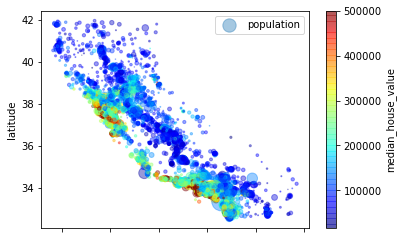

In [39]:
df_train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=df_["population"]/100, \
         label="population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True) 

plt.legend()


In [40]:
corr_matrix = df_train.corr()

In [41]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
income_cat            0.642274
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

#### Create new features based on the demands of the model. 

For example, the total number of rooms is not very useful if you don’t know how many households there are. We can calculate the number of rooms per household. 

In [42]:
df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"] 
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"] 
df_train["population_per_household"]=df_train["population"]/df_train["households"]

In [43]:
corr_matrix = df_train.corr()

In [44]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
income_cat                  0.642274
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

### 4. Prepare the data for Machine Learning algorithms.

In [50]:
df_train = strat_train_set.copy()
train_input = df_train.drop("median_house_value", axis=1)
train_label = strat_train_set["median_house_value"].copy()

#### Data Cleaning
1. Remove null values

In [67]:
train_input = train_input.dropna(subset=["total_bedrooms"]) 

In [68]:
housing_num = train_input.drop("ocean_proximity", axis=1)

2. Handling Categorical Attributes

Turn the strings in the "ocean_proximity" column into numbers.

In [69]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = train_input["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [70]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


Encode the categories as one-hot vectors

In [71]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16354x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16354 stored elements in Compressed Sparse Row format>

In [72]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

3. Feature Scaling

There are two common ways to get all attributes to have the same scale: min-max scaling and standardization.

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
scale_pipeline = Pipeline([
('std_scaler', StandardScaler())])
housing_num_tr = scale_pipeline.fit_transform(housing_num)

In [76]:
housing_num_tr

array([[-1.1562985 ,  0.77198428,  0.74387575, ..., -0.42079982,
        -0.61579586, -0.95509832],
       [-1.17628181,  0.65973958, -1.16381502, ..., -1.02270615,
         1.33604608,  1.88915259],
       [ 1.18674452, -1.3419575 ,  0.18746594, ..., -0.09321363,
        -0.53288511, -0.95509832],
       ...,
       [ 1.5864107 , -0.72461167, -1.5612506 , ...,  0.71376699,
        -0.31749569, -0.00701468],
       [ 0.7820825 , -0.85088695,  0.18746594, ..., -0.37552368,
         0.09742563, -0.00701468],
       [-1.43606483,  0.99647367,  1.85669537, ...,  0.37819089,
        -0.15855278, -0.00701468]])

We can create pipeline to finish all the data cleaning processes in one step.

In [92]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin): 
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names 
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
 64 |
self.add_bedrooms_per_room = add_bedrooms_per_room def fit(self, X, y=None):
return self # nothing else to do def transform(self, X, y=None):
rooms_per_household = X[:, rooms_ix] / X[:, household_ix] population_per_household = X[:, population_ix] / X[:, household_ix] if self.add_bedrooms_per_room:
bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]

ImportError: cannot import name 'Imputer' from 'sklearn.impute' (/Users/sisichen/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/__init__.py)

In [95]:
from sklearn.pipeline import FeatureUnion 
from sklearn.base import BaseEstimator, TransformerMixin

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
('selector', DataFrameSelector(num_attribs)), \
#    ('imputer', Imputer(strategy="median")), \
    ('attribs_adder', CombinedAttributesAdder()),\
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
('selector', DataFrameSelector(cat_attribs)), \
    ('label_binarizer', LabelBinarizer()),
])
full_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline), ("cat_pipeline", cat_pipeline)])

housing_prepared = full_pipeline.fit_transform(train_input)

NameError: name 'CombinedAttributesAdder' is not defined

In [ ]:
5. Select a model and train it.
6. Fine-tune your model.
7. Present your solution.
8. Launch, monitor, and maintain your system.
